Classification is when the feature to be predicted contains categories of values. Each of these categories is considered as a class into which the predicted value falls and hence has its name, classification.



# Supervised Learning In-Depth: Support Vector Machines

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

## Motivating Support Vector Machines

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

Let's show a quick example of support vector classification. First we need to create a dataset:

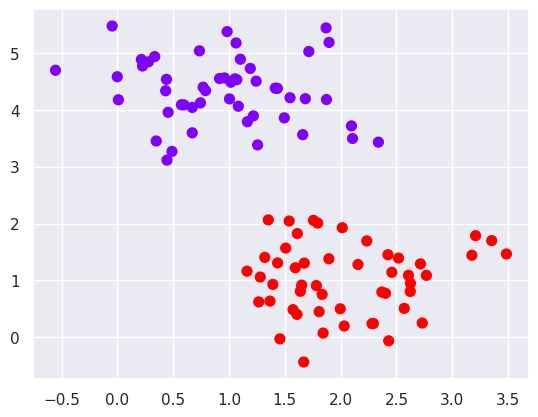

In [2]:
from sklearn.datasets import make_blobs # Import make_blobs from sklearn.datasets
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

The classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example, we could come up with several possibilities which perfectly discriminate between the classes in this example:

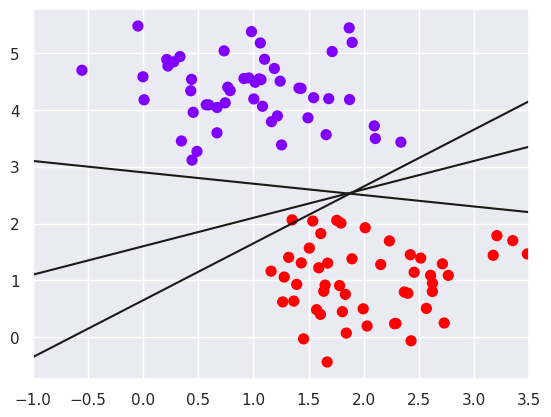

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

### Support Vector Machines: Maximizing the *Margin*

Support vector machines are one way to address this.
What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.  Here's an example of what it might look like:

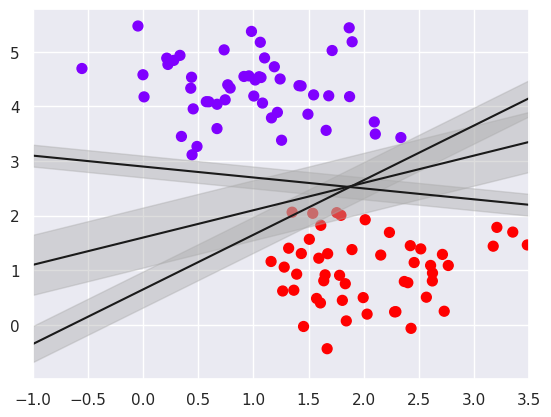

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Notice here that if we want to maximize this width, the middle fit is clearly the best.
This is the intuition of **support vector machines**, which optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

#### Fitting a Support Vector Machine

Now we'll fit a Support Vector Machine Classifier to these points. While the mathematical details of the likelihood model are interesting, we'll let you read about those elsewhere. Instead, we'll just treat the scikit-learn algorithm as a black box which accomplishes the above task.

In [5]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [6]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            # Reshape [xi, yj] to a 2D array with shape (1, 2)
            P[i, j] = clf.decision_function([[xi, yj]]) # Changed this line
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

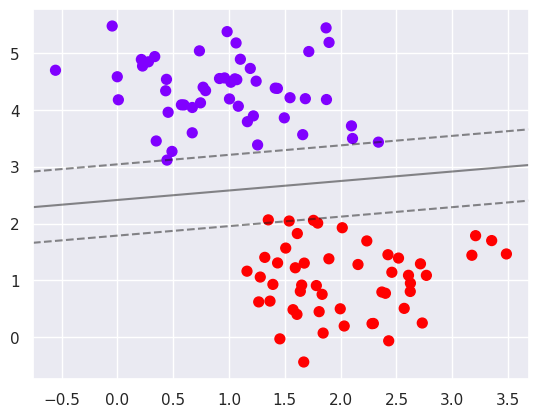

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf);

Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the *support vectors* (giving the algorithm its name).
In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

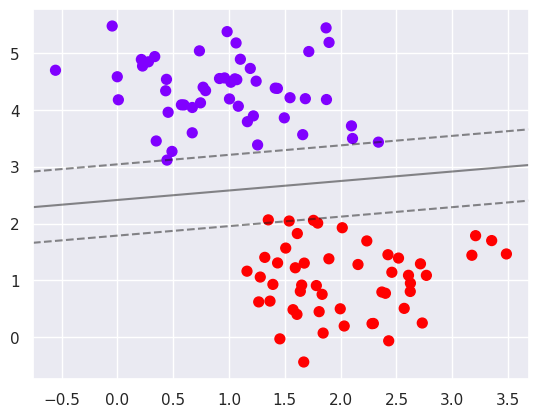

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

Let's use IPython's ``interact`` functionality to explore how the distribution of points affects the support vectors and the fit.
(This is only available in IPython 2.0+, and will not work in a static view)

In [9]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')

interact(plot_svm, N=[10, 200], kernel='linear');

ModuleNotFoundError: No module named 'IPython.html'

Notice the unique thing about SVM is that only the support vectors matter: that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!

Even though the SVM is robust to additional distant points, the support vectors themselves did change for N=10 case due to:Fewer candidate points near the margin and different sample size N


## Strength of SVM:


**Strength of  SVM**

This example shows that when the support vectors remain the same, increasing the number of points does not change the decision boundary
 the unique thing about SVM is that only the support vectors matter: that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results! Insensitivity to distant or non-support vectors makes SVM robust and generalizable.

Adding more data points away from the margin does not affect the model, illustrating one of SVM’s core strengths.


**example shows that when the support vectors remain the same, increasing the number of points does not change the decision boundary**

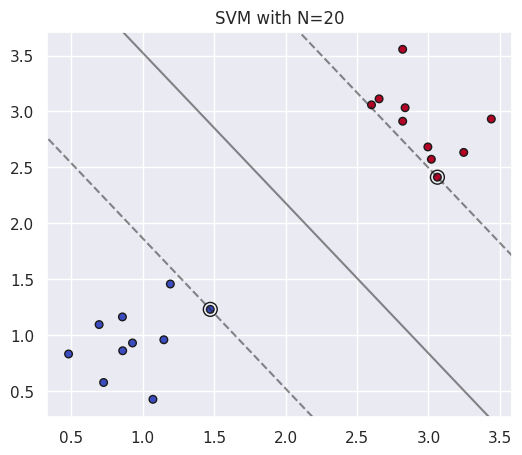

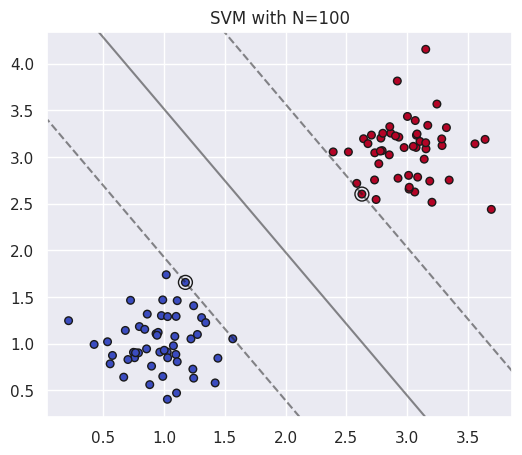

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Set seed for reproducibility
np.random.seed(42)

# Generate base data
def generate_data(n_points):
    X1 = np.random.normal(loc=[1, 1], scale=0.3, size=(n_points//2, 2))
    X2 = np.random.normal(loc=[3, 3], scale=0.3, size=(n_points//2, 2))
    X = np.vstack((X1, X2))
    y = np.array([0]*(n_points//2) + [1]*(n_points//2))
    return X, y

# Generate two datasets with different N
X_small, y_small = generate_data(20)
X_large, y_large = generate_data(100)

# Train SVM models
svm_small = SVC(kernel='linear', C=1.0)
svm_large = SVC(kernel='linear', C=1.0)

svm_small.fit(X_small, y_small)
svm_large.fit(X_large, y_large)

# Plotting function
def plot_svm_decision_boundary(X, y, model, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

# Plot both
plot_svm_decision_boundary(X_small, y_small, svm_small, "SVM with N=20")
plot_svm_decision_boundary(X_large, y_large, svm_large, "SVM with N=100")


**Observations:**

-- The decision boundary (solid line) and margins (dashed lines) are almost identical in both plots.

-- The support vectors (circled) are very similar across both cases, especially on the margin.

-- Many added points in the N=100 case do not become support vectors, as they lie far from the margin — confirming SVM’s insensitivity to non-critical data.


# support vectors change due to increased overlap between the classes
-- When support vectors change (as happens here due to overlapping distributions and more data), the SVM decision boundary and margin also change.

-- This is a perfect demonstration of your earlier point: SVM is sensitive only to support vectors — not the entire dataset.

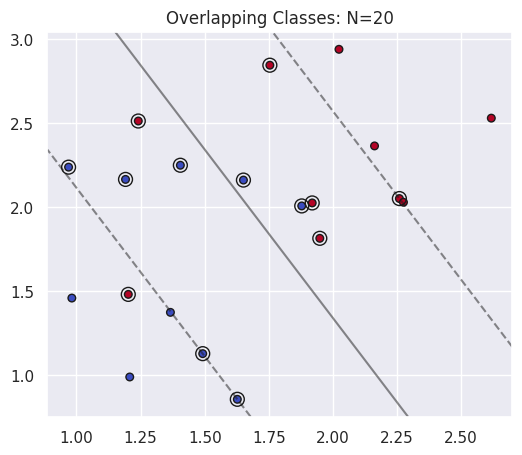

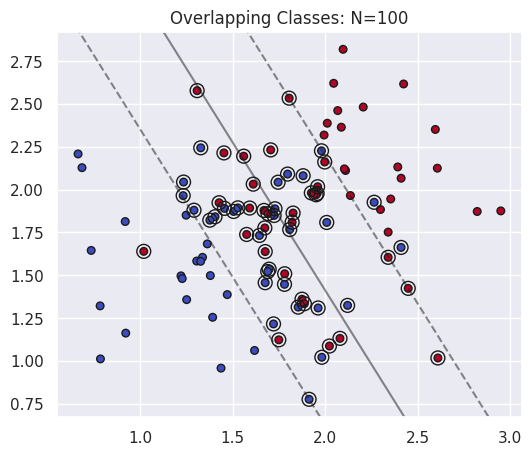

In [ ]:
# Generate a modified dataset where support vectors may change due to closer overlap or less separation
def generate_overlapping_data(n_points):
    # Shift the means closer to cause more overlap
    X1 = np.random.normal(loc=[1.5, 1.5], scale=0.4, size=(n_points//2, 2))
    X2 = np.random.normal(loc=[2.0, 2.0], scale=0.4, size=(n_points//2, 2))
    X = np.vstack((X1, X2))
    y = np.array([0]*(n_points//2) + [1]*(n_points//2))
    return X, y

# Create overlapping datasets
X_small_overlap, y_small_overlap = generate_overlapping_data(20)
X_large_overlap, y_large_overlap = generate_overlapping_data(100)

# Train new SVM models
svm_small_overlap = SVC(kernel='linear', C=1.0)
svm_large_overlap = SVC(kernel='linear', C=1.0)

svm_small_overlap.fit(X_small_overlap, y_small_overlap)
svm_large_overlap.fit(X_large_overlap, y_large_overlap)

# Plot results
plot_svm_decision_boundary(X_small_overlap, y_small_overlap, svm_small_overlap, "Overlapping Classes: N=20")
plot_svm_decision_boundary(X_large_overlap, y_large_overlap, svm_large_overlap, "Overlapping Classes: N=100")


**Observations:**

- N = 20 (First Plot):

-- The decision boundary is steeper.

-- Fewer support vectors because of limited data.

-- Margin is drawn based on sparse and noisy samples.

- N = 100 (Second Plot):

-- The decision boundary changes significantly (shallower slope).

-- Much more overlap between the classes.

-- More support vectors appear (due to class mixing near the margin).

-- The model adapts to a more statistically stable boundary due to more data.

#### Going further: Kernel Methods

Where SVM gets incredibly exciting is when it is used in conjunction with *kernels*.
To motivate the need for kernels, let's look at some data which is not linearly separable:

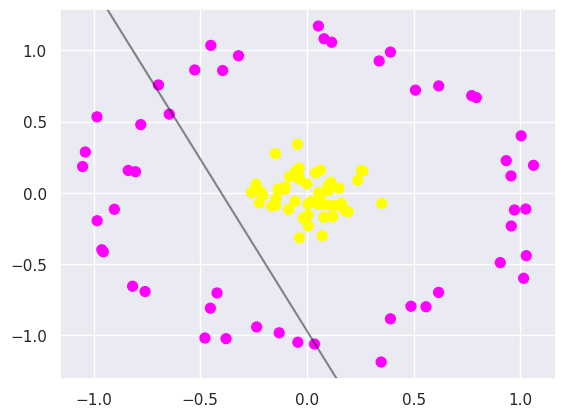

In [ ]:
from sklearn.datasets import make_circles # Import make_circles directly from sklearn.datasets
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);



Clearly, no linear discrimination will ever separate these data.
One way we can adjust this is to apply a **kernel**, which is some functional transformation of the input data.

For example, one simple model we could use is a **radial basis function**

In [ ]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

We can see that with this additional dimension, the data becomes trivially linearly separable!
This is a relatively simple kernel; SVM has a more sophisticated version of this kernel built-in to the process. This is accomplished by using ``kernel='rbf'``, short for *radial basis function*:

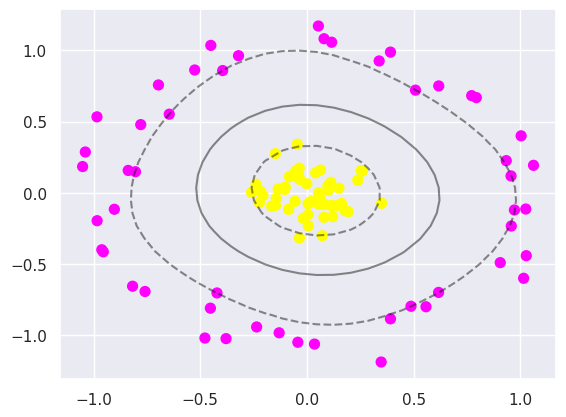

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

Here there are effectively $N$ basis functions: one centered at each point! Through a clever mathematical trick, this computation proceeds very efficiently using the "Kernel Trick", without actually constructing the matrix of kernel evaluations.

